In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv(r"E:\kaggle\competions\House prices/train.csv")
test = pd.read_csv(r"E:\kaggle\competions\House prices/test.csv")
sample_sub = pd.read_csv(r"E:\kaggle\competions\House prices/sample_submission.csv")

In [3]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [6]:
train.shape

(1460, 81)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [10]:
test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [11]:
train['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

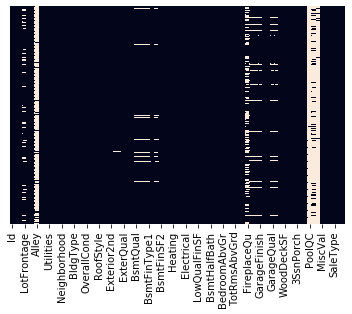

In [12]:
sns.heatmap(train.isnull(),yticklabels = False, cbar= False)

In [13]:
# Filling missing value
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean())

In [14]:
train.drop(['Alley'], axis=1, inplace=True)

In [15]:
train['BsmtQual'] = train['BsmtQual'].fillna(train['BsmtQual'].mode()[0])
train['BsmtCond'] = train['BsmtCond'].fillna(train['BsmtCond'].mode()[0])

In [16]:
train['FireplaceQu'] = train['FireplaceQu'].fillna(train['FireplaceQu'].mode()[0])
train['GarageType'] = train['GarageType'].fillna(train['GarageType'].mode()[0])

In [17]:
train.drop(['GarageYrBlt'], axis = 1, inplace=True)

In [18]:
train['GarageFinish'] = train['GarageFinish'].fillna(train['GarageFinish'].mode()[0])
train['GarageQual'] = train['GarageQual'].fillna(train['GarageQual'].mode()[0])
train['GarageCond'] = train['GarageCond'].fillna(train['GarageCond'].mode()[0])

In [19]:
train.drop(['PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace= True)

In [20]:
train.shape

(1460, 76)

In [21]:
test.shape

(1459, 80)

In [22]:
train.drop(['Id'], axis=1, inplace=True)

In [23]:
train.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [24]:
train['MasVnrType']=train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])
train['MasVnrArea']=train['MasVnrArea'].fillna(train['MasVnrArea'].mode()[0])

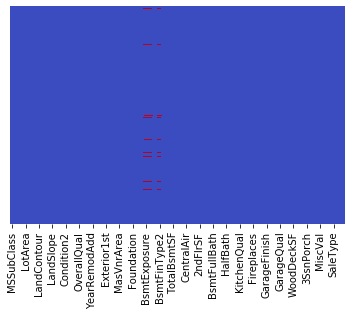

In [25]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='coolwarm')

In [26]:
train['BsmtExposure'] = train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0])

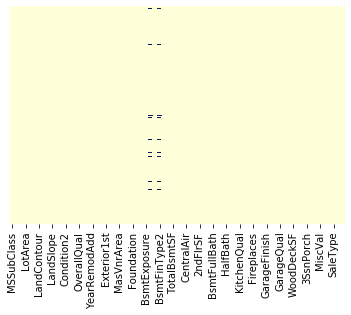

In [27]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='YlGnBu')

In [28]:
train['BsmtFinType2'] = train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode()[0])

In [29]:
train.dropna(inplace=True)

In [30]:
train.shape

(1422, 75)

## Handle Test Data set

In [31]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [32]:
#check null values
test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [33]:
## Fill Missing Values

test['LotFrontage']=test['LotFrontage'].fillna(test['LotFrontage'].mean())

test['MSZoning']=test['MSZoning'].fillna(test['MSZoning'].mode()[0])

In [34]:
test.shape

(1459, 80)

In [35]:
test.drop(['Alley'],axis=1,inplace=True)

In [36]:
test.shape

(1459, 79)

In [37]:
test['BsmtCond']=test['BsmtCond'].fillna(test['BsmtCond'].mode()[0])
test['BsmtQual']=test['BsmtQual'].fillna(test['BsmtQual'].mode()[0])
test['FireplaceQu']=test['FireplaceQu'].fillna(test['FireplaceQu'].mode()[0])
test['GarageType']=test['GarageType'].fillna(test['GarageType'].mode()[0])

In [38]:

test.drop(['GarageYrBlt'],axis=1,inplace=True)

In [39]:
test.shape

(1459, 78)

In [40]:
test['GarageFinish']=test['GarageFinish'].fillna(test['GarageFinish'].mode()[0])
test['GarageQual']=test['GarageQual'].fillna(test['GarageQual'].mode()[0])
test['GarageCond']=test['GarageCond'].fillna(test['GarageCond'].mode()[0])

test.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [41]:
test.shape

(1459, 75)

In [42]:
test.drop(['Id'],axis=1,inplace=True)

In [43]:
test['MasVnrType']=test['MasVnrType'].fillna(test['MasVnrType'].mode()[0])
test['MasVnrArea']=test['MasVnrArea'].fillna(test['MasVnrArea'].mode()[0])

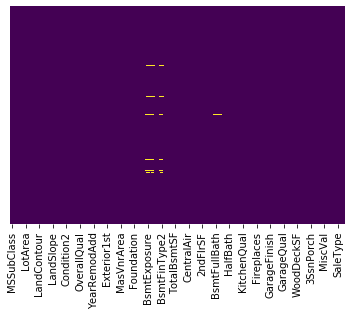

In [44]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [45]:
test['BsmtExposure']=test['BsmtExposure'].fillna(test['BsmtExposure'].mode()[0])

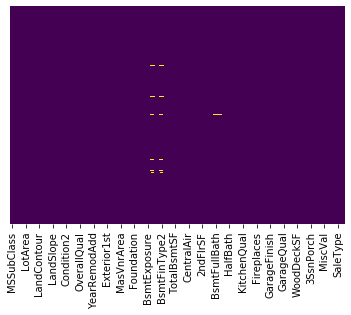

In [46]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [47]:
test['BsmtFinType2']=test['BsmtFinType2'].fillna(test['BsmtFinType2'].mode()[0])

In [48]:
test.loc[:, test.isnull().any()].head()

,Utilities,Exterior1st,Exterior2nd,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,KitchenQual,Functional,GarageCars,GarageArea,SaleType
0,AllPub,VinylSd,VinylSd,Rec,468.0,144.0,270.0,882.0,0.0,0.0,TA,Typ,1.0,730.0,WD
1,AllPub,Wd Sdng,Wd Sdng,ALQ,923.0,0.0,406.0,1329.0,0.0,0.0,Gd,Typ,1.0,312.0,WD
2,AllPub,VinylSd,VinylSd,GLQ,791.0,0.0,137.0,928.0,0.0,0.0,TA,Typ,2.0,482.0,WD
3,AllPub,VinylSd,VinylSd,GLQ,602.0,0.0,324.0,926.0,0.0,0.0,Gd,Typ,2.0,470.0,WD
4,AllPub,HdBoard,HdBoard,ALQ,263.0,0.0,1017.0,1280.0,0.0,0.0,Gd,Typ,2.0,506.0,WD


In [49]:
test['Utilities']=test['Utilities'].fillna(test['Utilities'].mode()[0])
test['Exterior1st']=test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
test['Exterior2nd']=test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])
test['BsmtFinType1']=test['BsmtFinType1'].fillna(test['BsmtFinType1'].mode()[0])
test['BsmtFinSF1']=test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean())
test['BsmtFinSF2']=test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].mean())
test['BsmtUnfSF']=test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].mean())
test['TotalBsmtSF']=test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())
test['BsmtFullBath']=test['BsmtFullBath'].fillna(test['BsmtFullBath'].mode()[0])
test['BsmtHalfBath']=test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mode()[0])
test['KitchenQual']=test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
test['Functional']=test['Functional'].fillna(test['Functional'].mode()[0])
test['GarageCars']=test['GarageCars'].fillna(test['GarageCars'].mean())
test['GarageArea']=test['GarageArea'].fillna(test['GarageArea'].mean())
test['SaleType']=test['SaleType'].fillna(test['SaleType'].mode()[0])

In [50]:
test.shape

(1459, 74)

### Handle Categorical Feature

In [51]:
columns = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2','BldgType','HouseStyle', 'SaleType',
          'SaleCondition', 'ExterCond',
          'ExterQual', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive' 
        ]

In [52]:
len(columns)

39

In [53]:
# Csonverting Categorical Features into dummy variables
def category_onehot_multcols(multcolumns):
    train_final = final_train
    i=0
    for fields in multcolumns:
        print(fields)
        train1 = pd.get_dummies(final_train[fields], drop_first=True)
        
        final_train.drop([fields],axis=1, inplace=True)
        if i==0:
            train_final = train1.copy()
        else:
            
            train_final = pd.concat([train_final, train1], axis=1)
        i=i+1 
        
    train_final = pd.concat([final_train, train_final], axis = 1)
    
    return train_final
    
        

In [54]:
main_train = train.copy

In [55]:

test.shape

(1459, 74)

In [56]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [57]:
final_train = pd.concat([train,test], axis = 0)

In [58]:
final_train['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2881, dtype: float64

In [59]:
final_train.shape

(2881, 75)

In [60]:
final_train= category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [61]:
final_train = final_train.loc[:, ~final_train.columns.duplicated()]

In [62]:
final_train.shape


(2881, 175)

In [63]:
train_df = final_train.iloc[:1422,:]
test_df = final_train.iloc[1422:,:]

In [64]:
train_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [65]:
test_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,1,1,0,0,0,0,0,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,1,1,0,0,0,0,0,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,1,1,0,0,0,0,0,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,1,1,0,0,0,0,0,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [66]:
train_df.shape

(1422, 175)

In [67]:
test_df.drop(['SalePrice'],axis=1, inplace = True)

C:\Users\Asus\Anaconda3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [68]:
X_train = train_df.drop(['SalePrice'],axis=1)
y_train = train_df['SalePrice']

In [69]:
test_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,1,1,0,0,0,0,0,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,1,1,0,0,0,0,0,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,1,1,0,0,0,0,0,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,1,1,0,0,0,0,0,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,1,1,0,0,0,0,1,0


## Algorithm

In [70]:
import xgboost
classifier=xgboost.XGBRegressor()

In [71]:
import xgboost
regressor=xgboost.XGBRegressor()

In [72]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [73]:
# Hyper Parameter Optimization

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [74]:
# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [75]:
random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   24.9s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  4.3min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  8.8min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 13.0min finished


[02:44:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
          fit_params=None, iid='warn', n_iter=50, n_jobs=4,
          param_distributions={'n_estimators': [100, 500, 900, 1100, 1500], 'max_depth': [2, 3, 5, 10, 15], 'learning_rate': [0.05, 0.1, 0.15, 0.2], 'min_child_weight': [1, 2, 3, 4], 'booster': ['gbtree', 'gblinear'], 'base_score': [0.25, 0.5, 0.75, 1]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='neg_mean_absolute_error',
          verbose=5)

In [76]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [77]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [78]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1, verbosity=1)

In [79]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [80]:
y_pred = regressor.predict(test_df)

In [81]:
y_pred

array([113550.71 , 164318.23 , 189041.47 , ..., 178012.14 , 116729.805,
       238976.1  ], dtype=float32)

In [82]:
rf_pred = regressor.predict(test_df)

In [83]:
# create sample submission file and submit
prep = pd.DataFrame(y_pred)
sub_df = pd.read_csv('E:\kaggle\competions\House prices/sample_submission.csv')
datasets = pd.concat([sub_df['Id'],prep], axis=1)
datasets.columns = ['Id', 'SalePrice']
datasets.to_csv('sample_submission.csv', index=False)